# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Carregar o arquivo CSV
csv_file_path = 'sinasc_RO_2019.csv'
df = pd.read_csv(csv_file_path)

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

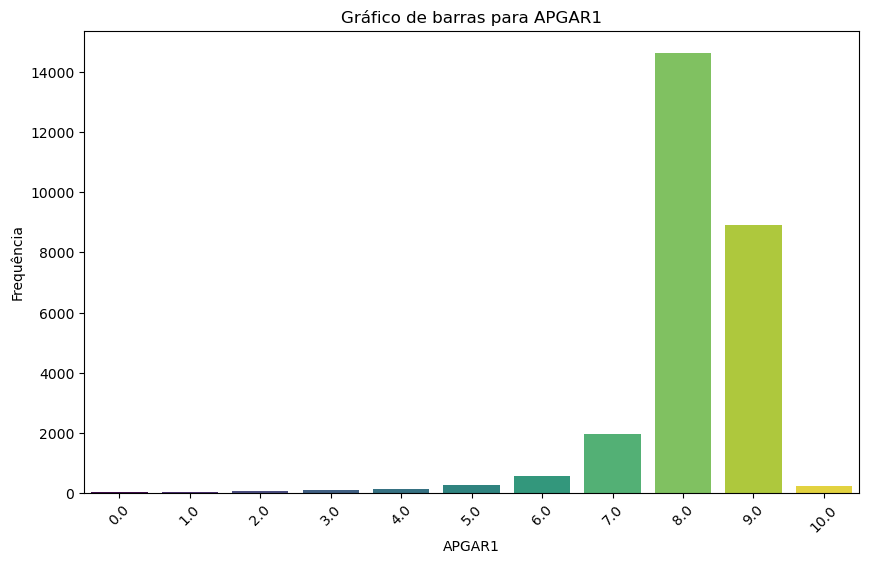

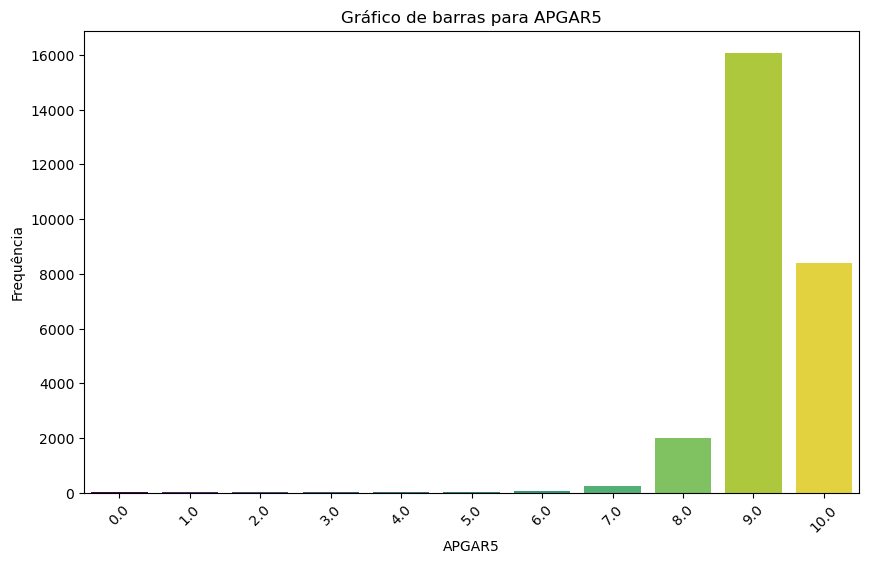

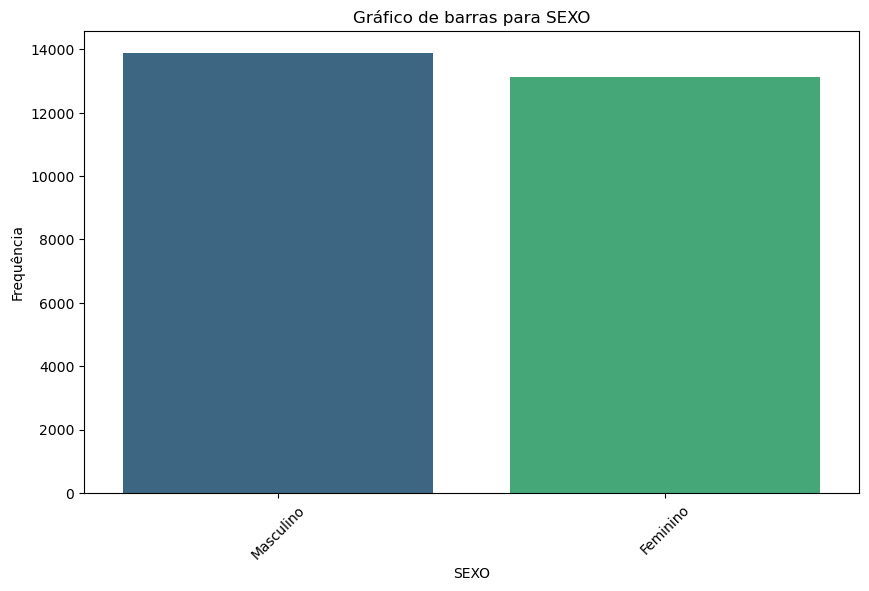

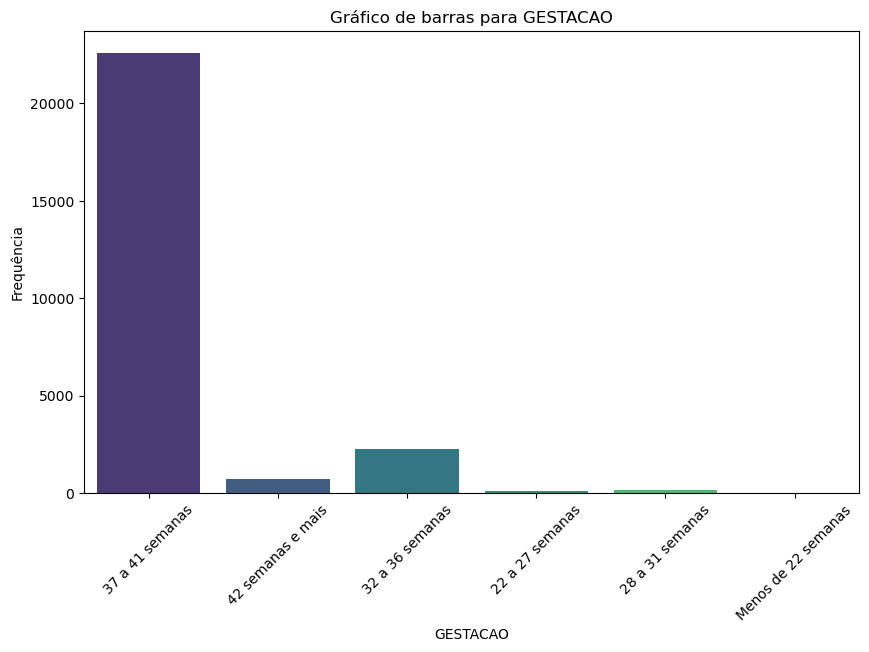

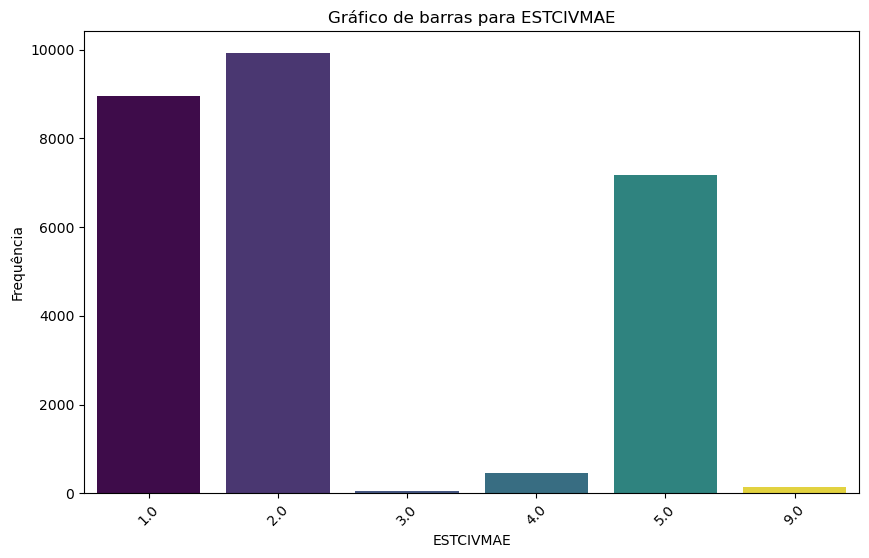

In [21]:
# Função para plotar gráficos de barras
def plot_bar_chart(column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column_name, hue=column_name, data=df, palette='viridis', dodge=False, legend=False)
    plt.title(f'Gráfico de barras para {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.show()

# Plotar gráficos de barras para as variáveis desejadas
columns_to_plot = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']
for column in columns_to_plot:
    plot_bar_chart(column)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

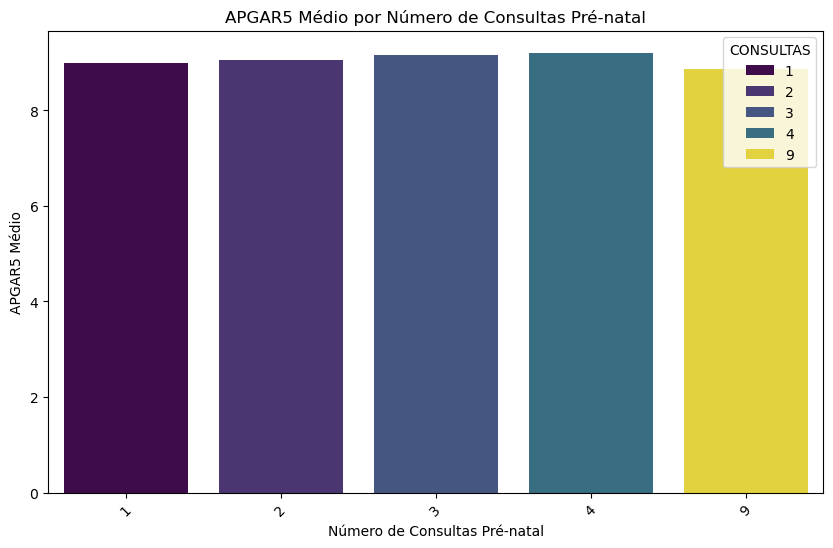

In [29]:
# Calcular o APGAR5 médio por CONSULTAS
apgar5_mean_by_consultas = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='CONSULTAS', y='APGAR5', hue='CONSULTAS', data=apgar5_mean_by_consultas, palette='viridis')
plt.title('APGAR5 Médio por Número de Consultas Pré-natal')
plt.xlabel('Número de Consultas Pré-natal')
plt.ylabel('APGAR5 Médio')
plt.xticks(rotation=45)
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

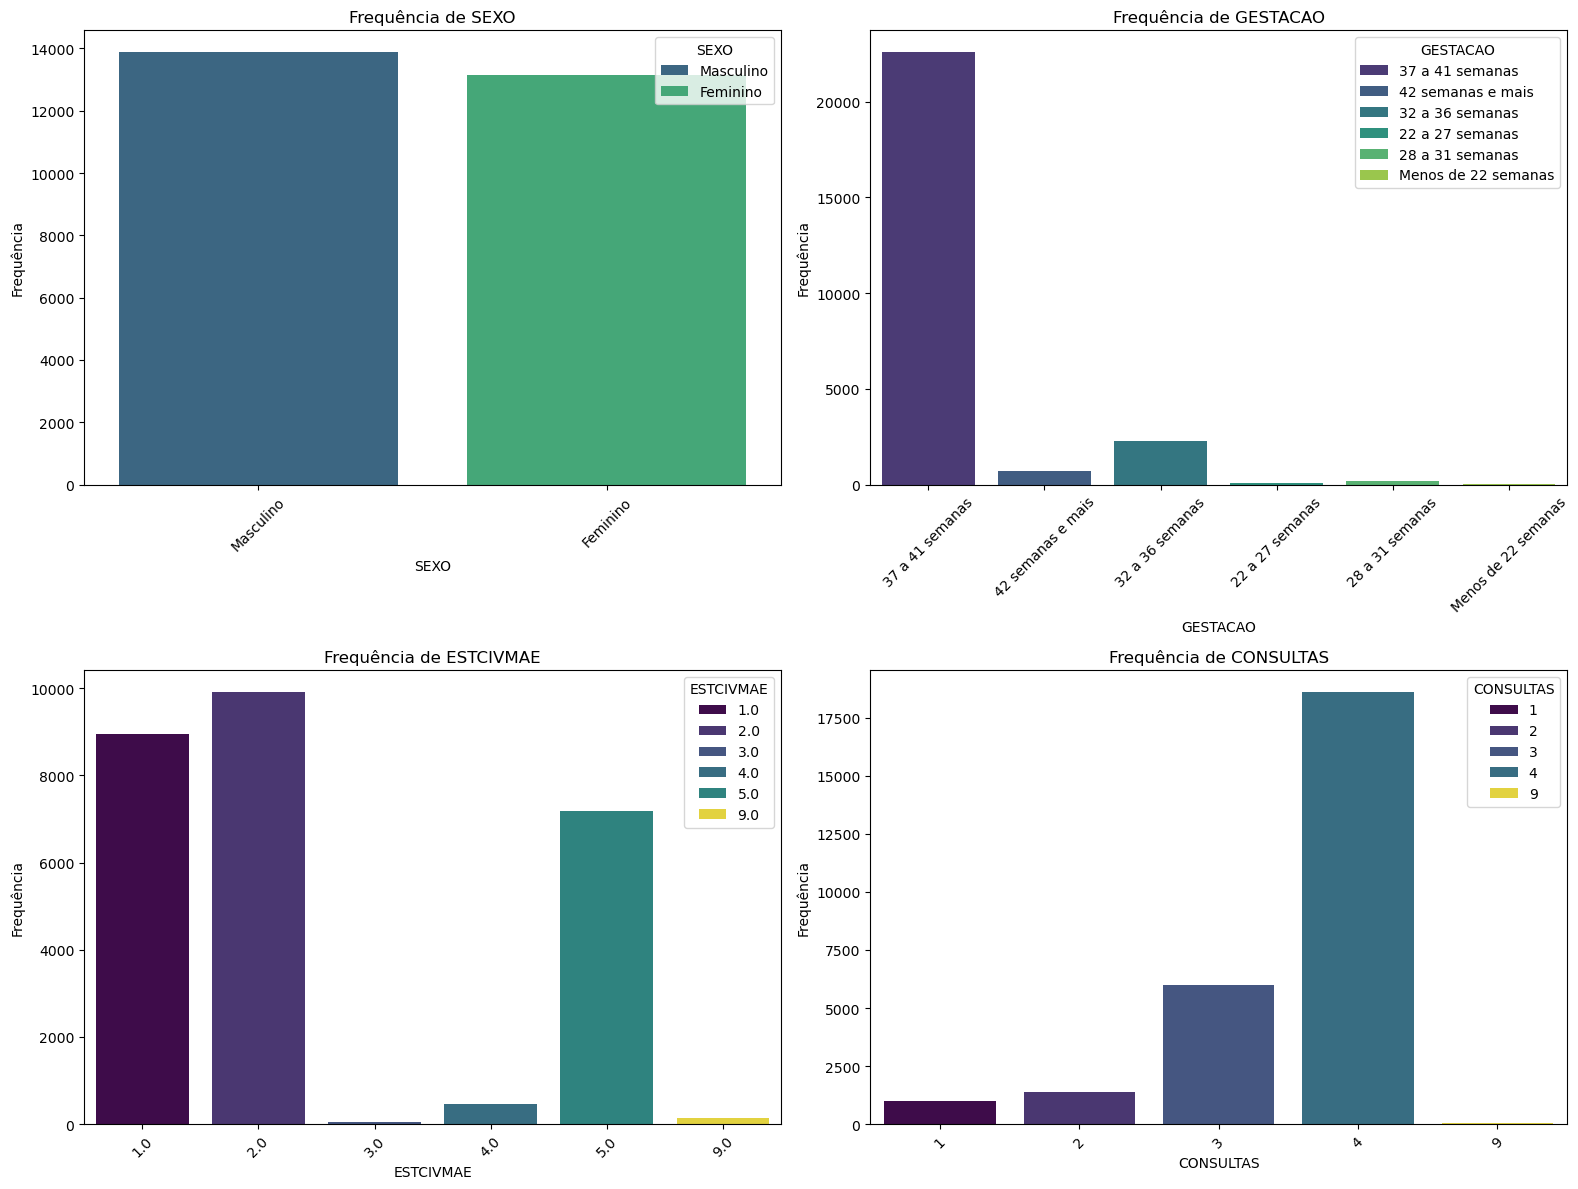

In [33]:
# Criar uma figura e eixos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Lista das colunas para plotar
columns_to_plot = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']

# Loop para criar os gráficos de barras
for i, column in enumerate(columns_to_plot):
    ax = axes[i//2, i%2]
    sns.countplot(x=column, data=df, hue=column, palette='viridis', ax=ax)
    ax.set_title(f'Frequência de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequência')
    ax.tick_params(axis='x', rotation=45)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()